In [1]:
# Import necessary library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [34]:
# Import the dataset
credit_df = pd.read_csv('credit_data.csv')

In [35]:
# Shape of the data
credit_df.shape

(2000, 5)

In [36]:
# Top 10 rows of the dataframe
credit_df.head(10)

,clientid,income,age,loan,default
0,1,66155.92510,59.017015,8106.532131,0
1,2,34415.15397,48.117153,6564.745018,0
2,3,57317.17006,63.108049,8020.953296,0
3,4,42709.53420,45.751972,6103.642260,0
4,5,66952.68885,18.584336,8770.099235,1
5,6,24904.06414,57.471607,15.498598,0
6,7,48430.35961,26.809132,5722.581981,0
7,8,24500.14198,32.897548,2971.003310,1
8,9,40654.89254,55.496853,4755.825280,0
9,10,25075.87277,39.776378,1409.230371,0


In [41]:
credit_df.isna().sum()

clientid    0
income      0
age         3
loan        0
default     0
dtype: int64

In [42]:
credit_df[credit_df.isna().any(axis=1)]

,clientid,income,age,loan,default
28,29,59417.80541,NaN,2082.625938,0
30,31,48528.85280,NaN,6155.784670,0
31,32,23526.30256,NaN,2862.010139,0


In [43]:
credit_df = credit_df.dropna()

In [44]:
# Descriptive Stats
credit_df.describe().T

,count,mean,std,min,25%,50%,75%,max
clientid,1997.0,1001.956935,576.702206,1.00000,503.000000,1002.000000,1501.000000,2000.000000
income,1997.0,45333.864334,14325.131177,20014.48947,32804.904490,45788.747100,57787.565660,69995.685580
age,1997.0,40.807559,13.624469,-52.42328,28.990415,41.317159,52.587040,63.971796
loan,1997.0,4445.487716,3046.792457,1.37763,1936.813257,3977.287432,6440.861434,13766.051240
default,1997.0,0.141713,0.348842,0.00000,0.000000,0.000000,0.000000,1.000000


In [45]:
credit_df.dtypes

clientid      int64
income      float64
age         float64
loan        float64
default       int64
dtype: object

In [46]:
credit_df[credit_df.age < 0 ]

,clientid,income,age,loan,default
15,16,50501.72669,-28.218361,3977.287432,0
21,22,32197.62070,-52.423280,4244.057136,0
26,27,63287.03891,-36.496976,9595.286289,0


In [47]:
credit_df.loc[credit_df.age < 0, "age" ] = credit_df.age * -1

In [48]:
credit_df[credit_df.age < 0 ]

,clientid,income,age,loan,default


In [49]:
# Descriptive Stats
credit_df.describe().T

,count,mean,std,min,25%,50%,75%,max
clientid,1997.0,1001.956935,576.702206,1.000000,503.000000,1002.000000,1501.000000,2000.000000
income,1997.0,45333.864334,14325.131177,20014.489470,32804.904490,45788.747100,57787.565660,69995.685580
age,1997.0,40.924874,13.267741,18.055189,29.033679,41.353171,52.587040,63.971796
loan,1997.0,4445.487716,3046.792457,1.377630,1936.813257,3977.287432,6440.861434,13766.051240
default,1997.0,0.141713,0.348842,0.000000,0.000000,0.000000,0.000000,1.000000


In [50]:
credit_df.drop(['clientid'], axis=1, inplace=True)

In [51]:
credit_df.head()

,income,age,loan,default
0,66155.92510,59.017015,8106.532131,0
1,34415.15397,48.117153,6564.745018,0
2,57317.17006,63.108049,8020.953296,0
3,42709.53420,45.751972,6103.642260,0
4,66952.68885,18.584336,8770.099235,1


In [52]:
credit_df.groupby(['default']).count()

,income,age,loan
default,,,
0,1714,1714,1714
1,283,283,283


In [53]:
credit_df_feature = credit_df.drop(['default'], axis=1)
credit_df_labels = credit_df['default']

In [54]:
from scipy.stats import zscore

In [55]:
credit_df_feature_z = credit_df_feature.apply(zscore)

In [56]:
credit_df_feature_z.head()

,income,age,loan
0,1.453898,1.363960,1.201907
1,-0.762398,0.542223,0.695744
2,0.836733,1.672382,1.173812
3,-0.183244,0.363913,0.544366
4,1.509532,-1.684246,1.419754


In [57]:
X = np.array(credit_df_feature_z)
y = np.array(credit_df_labels)

In [58]:
X.shape

(1997, 3)

In [59]:
y.shape

(1997,)

In [60]:
from sklearn.model_selection import train_test_split

In [61]:
# Split X and y into training and test set in 70:30 ratio

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

In [62]:
from sklearn.neighbors import KNeighborsClassifier

In [64]:
KNN = KNeighborsClassifier(n_neighbors= 3 , weights = 'distance' )

In [65]:
# Call Nearest Neighbour algorithm
KNN.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3, weights='distance')

In [66]:
# For every test data point, predict it's label based on 3 nearest neighbours in this model. The majority class will 
# be assigned to the test data point

predicted_labels = KNN.predict(X_test)
KNN.score(X_test, y_test)

0.9916666666666667

In [67]:
# calculate accuracy measures and confusion matrix
from sklearn import metrics

print(metrics.confusion_matrix(y_test, predicted_labels))

[[519   4]
 [  1  76]]


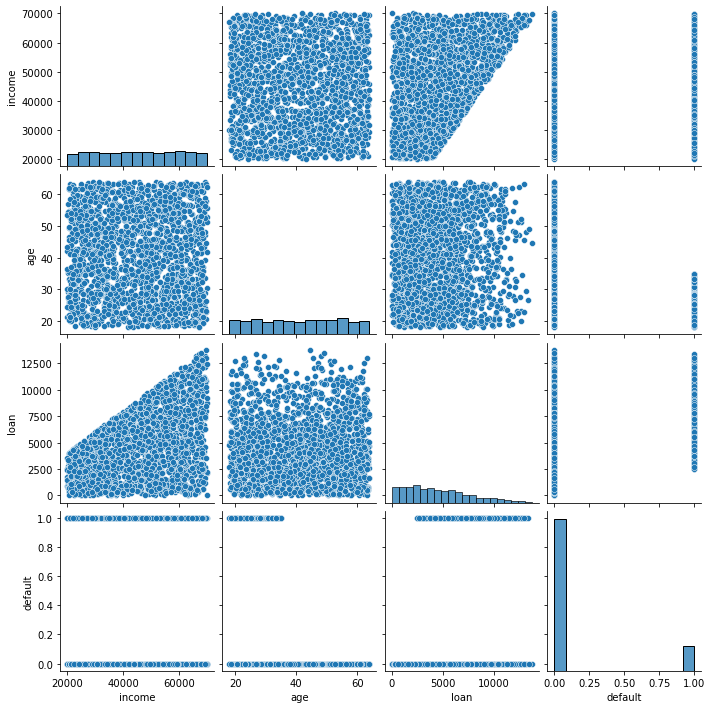

In [68]:
sns.pairplot(credit_df)